# Proyek Membangun Sistem Machine Learning: [Heart Attack Dataset]

-  **Nama** : Tandry Simamora
- **Email** : tandrysimamora@gmail.com
- **ID Dicoding** : Tandry Simamora

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diambil dari Kaggle dataset yaitu dataset  [Heart Attack Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset?select=Heart+Attack.csv). Penyakit Kardiovaskular (CVD) merupakan penyebab utama kematian di seluruh dunia. CVD mencakup berbagai kondisi seperti jantung koroner, penyakit serebrovaskular, penyakit jantung rematik, dan gangguan lain pada jantung serta pembuluh darah. Mnurut WHO, sebanyak 17.9 juta orang meninggal setiap tahunnya akibat penyakit ini. Serangan jantung dan stroke menyumbang lebih dari 80% kematian akibat CVD, dan sepertiga diantaranya terjadi sebelum usia 70 tahun.

   Dataset ini dikembangkan untuk membantu memahami faktor-faktor yang berkontribusi terhadap serangan jantung, dengan tujuan utama mendukung proses prediksi dan deteksi dini risiko serangan jantung.

2. **Deskripsi Dataset**
  - Jumlah sampel: 1319 data pasien
  - Jumlah fitur: 9 kolom
    - 8 Fitur input
    - 1 fitur output (target)

3. **Fitur-fitur Dataset**
- **age** : Usia pasien
- **gender** : jenis kelamin pasien (0=Perempuan, 1 = laki-laki)
- **impulse**: Denyut jantung (heart rate)
- **pressurehight**: Tekanan darah sistolik (Systolic blood pressure)
- **pressurelow**: Tekanan darah diastolik (Diastolic blood pressure)
- **glucose**: Kadar gula darah (Blood sugar)
- **kcm** : Nilai CK-MB, yaitu enzim jatung (Creatine Kinase-MB)
- **troponin**: Hasil tes troponin, indikator kerusakan otot jantung
- **class**: Target/label: apakah pasien mengalami serangan jantung (positive atau negative)


  




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

import os

# **3. Memuat Dataset**

Pada tahap ini, kita load dataset dari data yang sudah disimpan di drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEMBANGUN SISTEM MACHINE LEARNING/Heart Attack.csv")
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
df.describe(include='all')

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


In [ ]:
print("\nJumlah Data yang hilang")
print(df.isnull().sum())


Jumlah Data yang hilang
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [ ]:
print("\nJumlah Data Duplikat")
print(df.duplicated().sum())


Jumlah Data Duplikat
0


**Univariate Analysis (Numerikal Feature)**

In [ ]:
# Data Numerikal
numeric_features = df.select_dtypes(include=['number']).columns

# Data Kategorikal
categorical_features = df.select_dtypes(include=['object']).columns

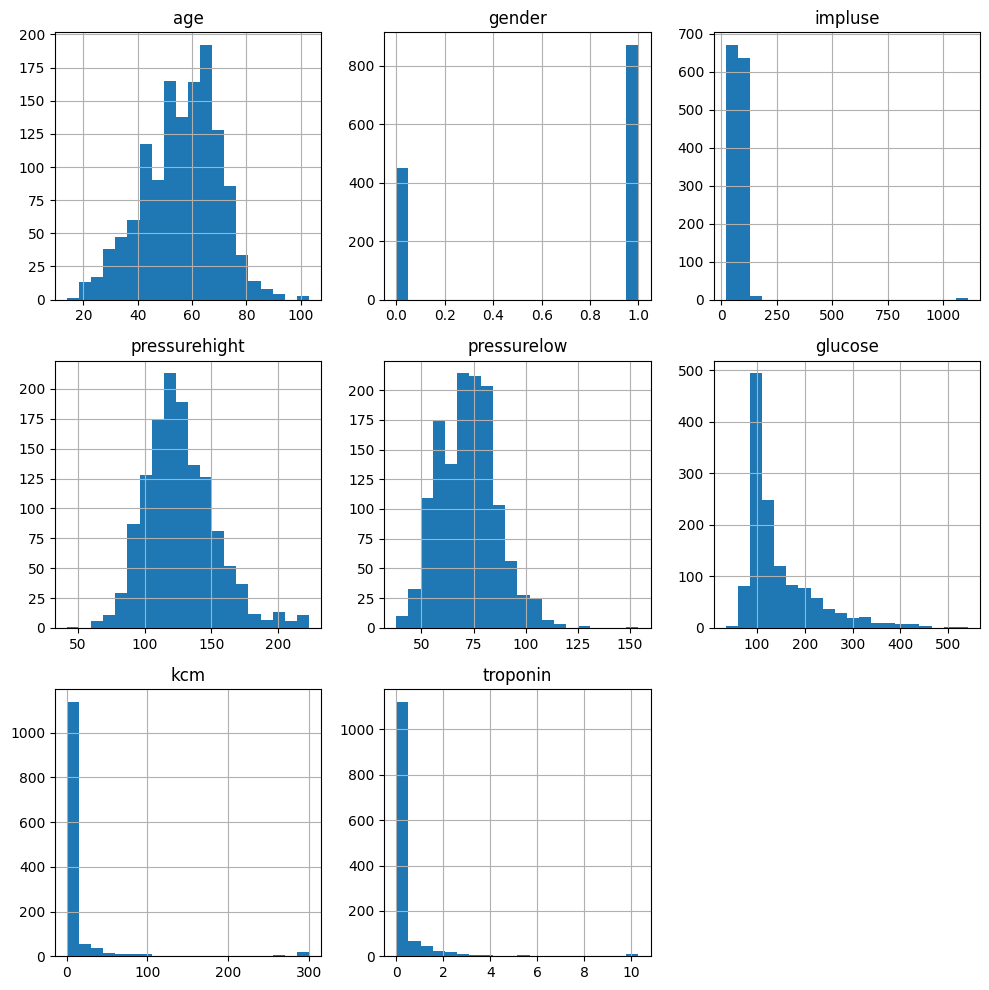

In [ ]:
# Distribusi data numerik
df[numeric_features].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

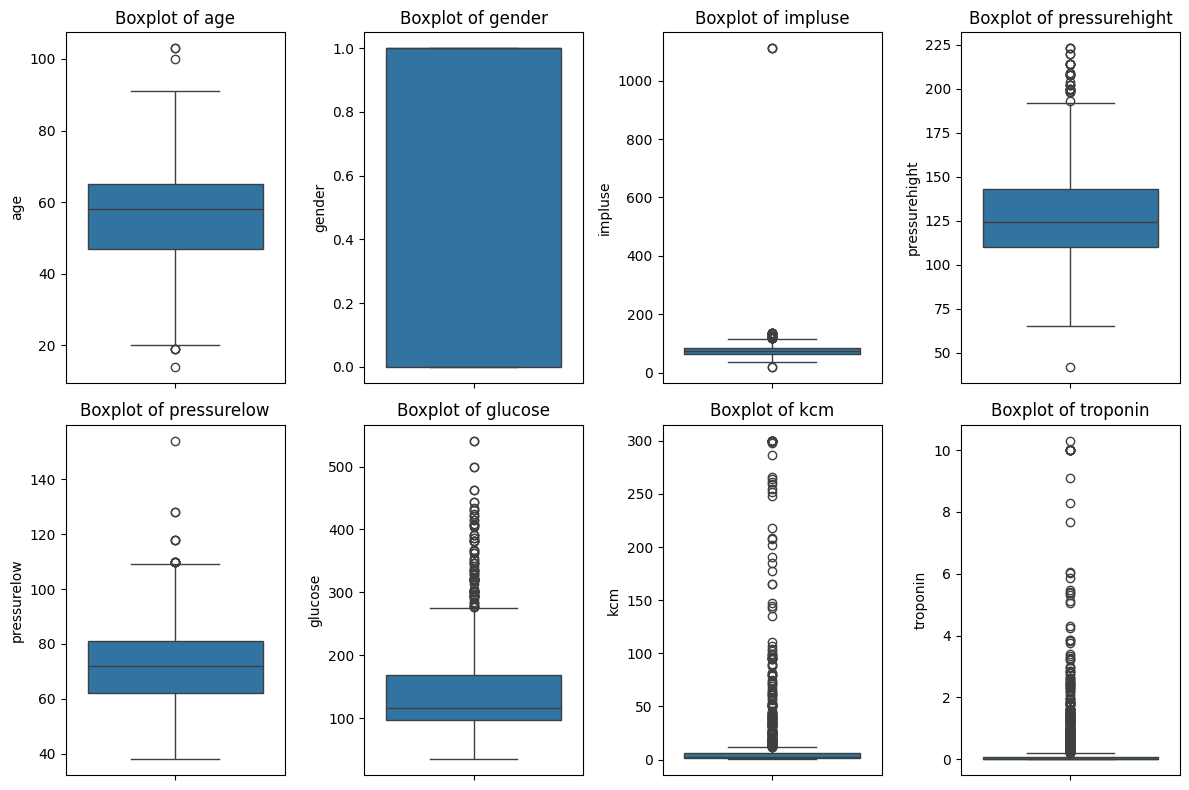

In [ ]:


plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features):
  plt.subplot(2, 4, i + 1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Univariate Analysis (Kategorikal Features)**

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'Jumlah':count, 'Persen':percent.round(1)})
count_percent

,Jumlah,Persen
class,,
positive,810,61.4
negative,509,38.6


**Multivariate Analysis**

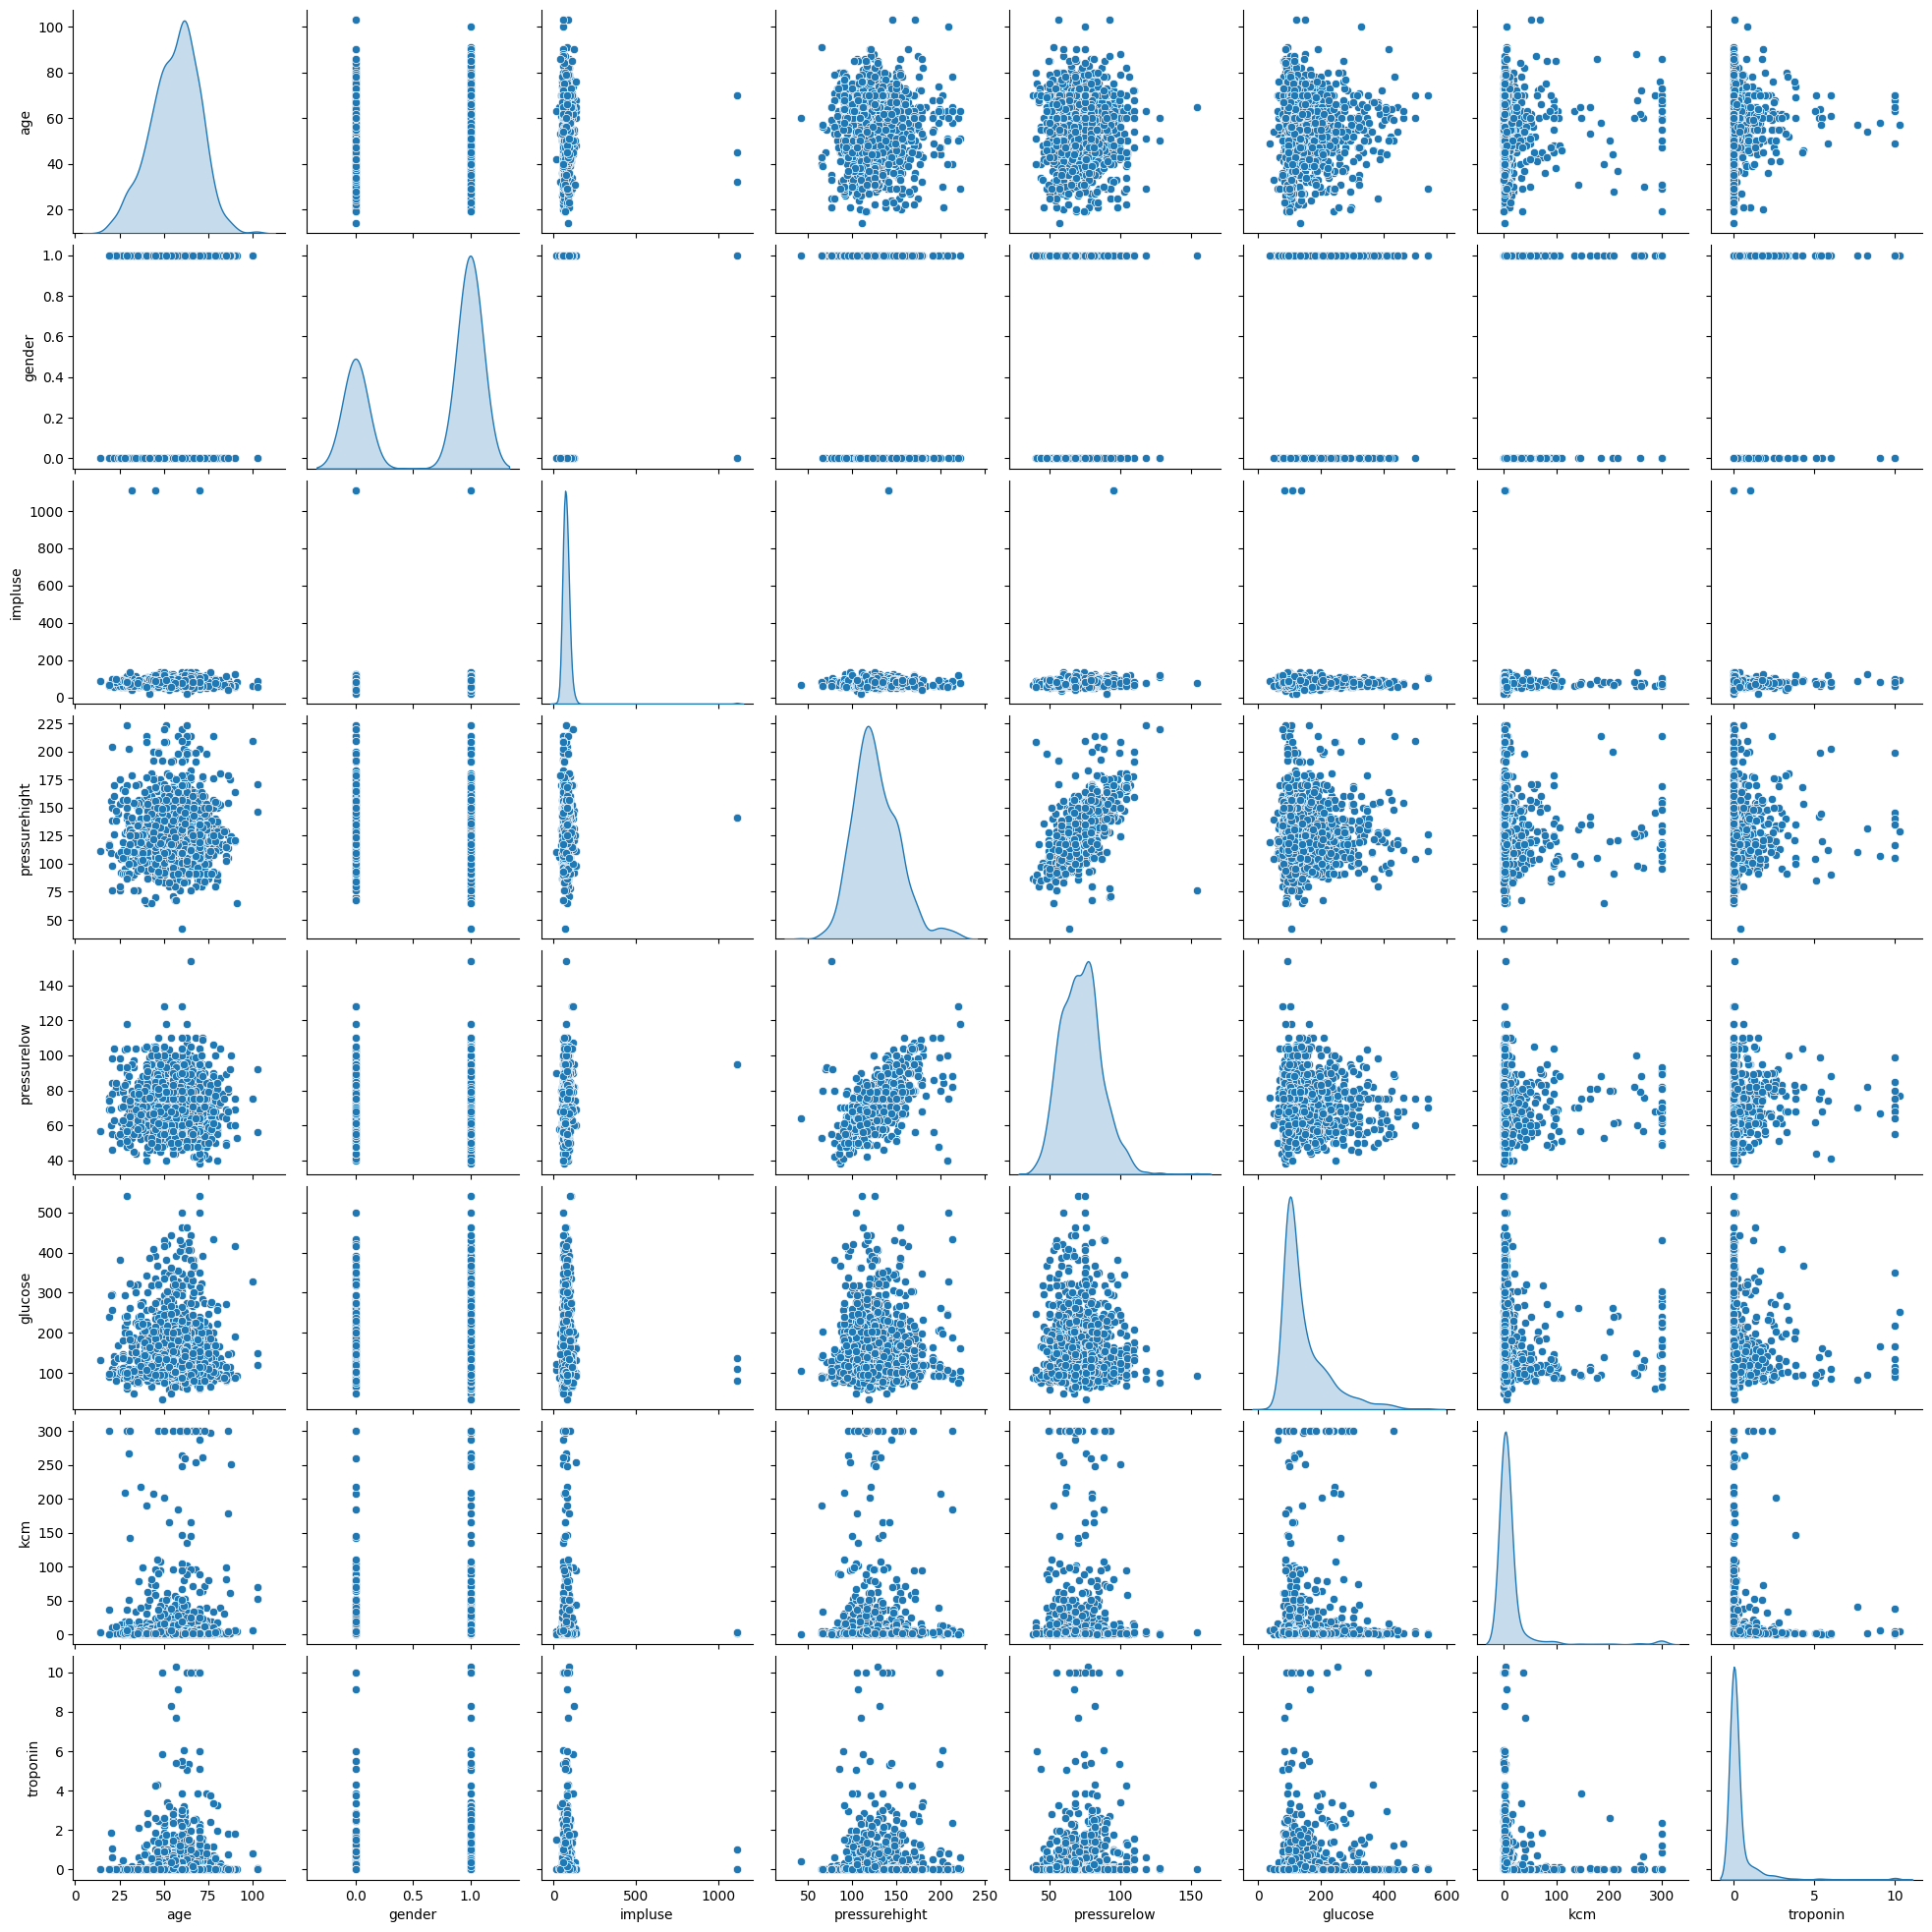

In [ ]:
# Mengamati hubungan antar fitur numerik dgn fungsi pairplot()
sns.pairplot(df, diag_kind='kde')

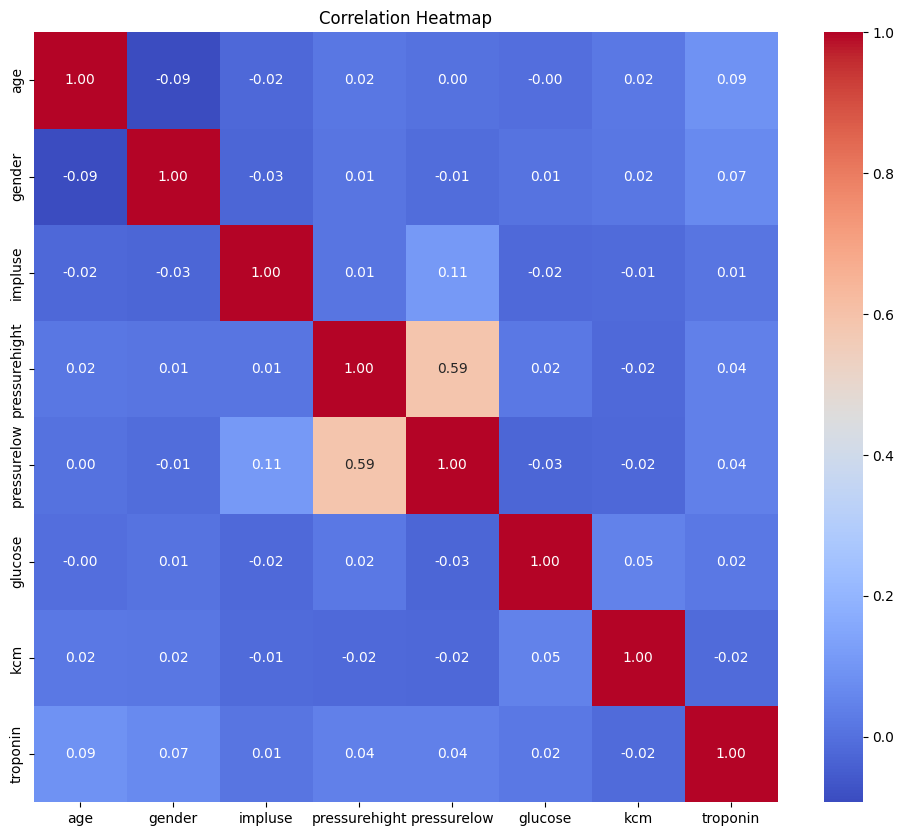

In [ ]:
correlation_matrix = df[numeric_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.


Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Penanganan Outlier
2. Encoding Dataset
3. Menyimpan dataset

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Karena tidak terdapat data duplikasi dan data yang hilang, maka tidak perlu ada penanganan khususs untuk tahap ini.

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Penagnanan data outlier
numerical_features = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
for col in numerical_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)

print("\nData setelah menangani outliers:")
print(df_cleaned.describe())


Data setelah menangani outliers:
               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.175891     0.659591    75.931766     126.828658    72.185747   
std      13.559602     0.474027    14.807730      25.029865    13.731063   
min      20.000000     0.000000    32.500000      60.500000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max      92.000000     1.000000   116.500000     192.500000   109.500000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    141.249962     4.463456     0.058548  
std      59.267678     3.825702     0.078493  
min      35.000000     0.321000     0.001000  
25%      98.000000     1.655000     0.006000  

In [ ]:
# Encoding variabel target
df_cleaned['class'] = df_cleaned['class'].map({'positive': 1, 'negative': 0})
print("\nNilai unik di kolom 'class' setelah encoding:")
print(df_cleaned['class'].unique())


Nilai unik di kolom 'class' setelah encoding:
[0 1]


**!!Untuk Mencegah adanya data leakage, normalisasi dan standarisasi data dilakukan pada proses modelling**

In [ ]:

# Create the directory if it doesn't exist
output_dir = './namadataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)

df_cleaned.to_csv(os.path.join(output_dir, 'heart_attack_preprocessed.csv'), index=False)
print("\nDataset yang sudah bersih berhasil disimpan!")


Dataset yang sudah bersih berhasil disimpan!
